In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('vehiculos.csv')

In [28]:
y = dataset['vehicle_class']
x = dataset.drop('vehicle_class', axis=1)



In [13]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)



In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
predicciones = knn.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [35]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

   micro avg       0.64      0.64      0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



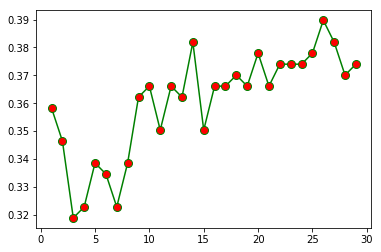

In [37]:
tasa_error = []

for i in range(1, 30):
	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(x_train,y_train)
	prediccion_i = knn.predict(x_test)
	tasa_error.append(np.mean(prediccion_i != y_test))


valores = range(1,30)
plt.plot(valores, tasa_error, color='green', marker='o', markerfacecolor='red', markersize=8)